In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re


In [20]:
algorithms = ["Multi-HNSW-64", "C-Multi-HNSW-64", "Multi-HNSW-128", "C-Multi-HNSW-128", "Multi-HNSW-256", "C-Multi-HNSW-256"]
datasets = ["CLERC-768"]

In [21]:
my_sorted_recall_list = [0.263]
my_sorted_qps_list = [63]
df_temp = pd.DataFrame({
    'Recall': my_sorted_recall_list,
    'Memory (GB)': my_sorted_qps_list,
    'Algorithm': 'Multi-HNSW-64',
    'Dataset':  datasets[0]
})

my_sorted_recall_list = [0.239]
my_sorted_qps_list = [34]
df_temp3 = pd.DataFrame({
    'Recall': my_sorted_recall_list,
    'Memory (GB)': my_sorted_qps_list,
    'Algorithm': 'C-Multi-HNSW-64',
    'Dataset': datasets[0]
})

df_combined = pd.concat([df_temp, df_temp3], ignore_index=True)

In [22]:
my_sorted_recall_list = [0.27]
my_sorted_qps_list = [71]
df_temp = pd.DataFrame({
    'Recall': my_sorted_recall_list,
    'Memory (GB)': my_sorted_qps_list,
    'Algorithm': 'Multi-HNSW-128',
    'Dataset':  datasets[0]
})

my_sorted_recall_list = [0.226]
my_sorted_qps_list = [45]
df_temp3 = pd.DataFrame({
    'Recall': my_sorted_recall_list,
    'Memory (GB)': my_sorted_qps_list,
    'Algorithm': 'C-Multi-HNSW-128',
    'Dataset': datasets[0]
})

df_combined_128 = pd.concat([df_temp, df_temp3], ignore_index=True)

In [23]:
my_sorted_recall_list = [0.273]
my_sorted_qps_list = [89]
df_temp = pd.DataFrame({
    'Recall': my_sorted_recall_list,
    'Memory (GB)': my_sorted_qps_list,
    'Algorithm': 'Multi-HNSW-256',
    'Dataset':  datasets[0]
})

my_sorted_recall_list = [0.247]
my_sorted_qps_list = [66]
df_temp3 = pd.DataFrame({
    'Recall': my_sorted_recall_list,
    'Memory (GB)': my_sorted_qps_list,
    'Algorithm': 'C-Multi-HNSW-256',
    'Dataset': datasets[0]
})

df_combined_256 = pd.concat([df_temp, df_temp3], ignore_index=True)

In [24]:
df = pd.concat([df_combined, df_combined_128, df_combined_256], ignore_index=True)

In [26]:
df

,Recall,Memory (GB),Algorithm,Dataset
0,0.263,63,Multi-HNSW-64,CLERC-768
1,0.239,34,C-Multi-HNSW-64,CLERC-768
2,0.270,71,Multi-HNSW-128,CLERC-768
3,0.226,45,C-Multi-HNSW-128,CLERC-768
4,0.273,89,Multi-HNSW-256,CLERC-768
5,0.247,66,C-Multi-HNSW-256,CLERC-768


In [16]:
# df.to_csv("/home/ali/hnswlib/evaluation/results_connectivity.csv", index=False)

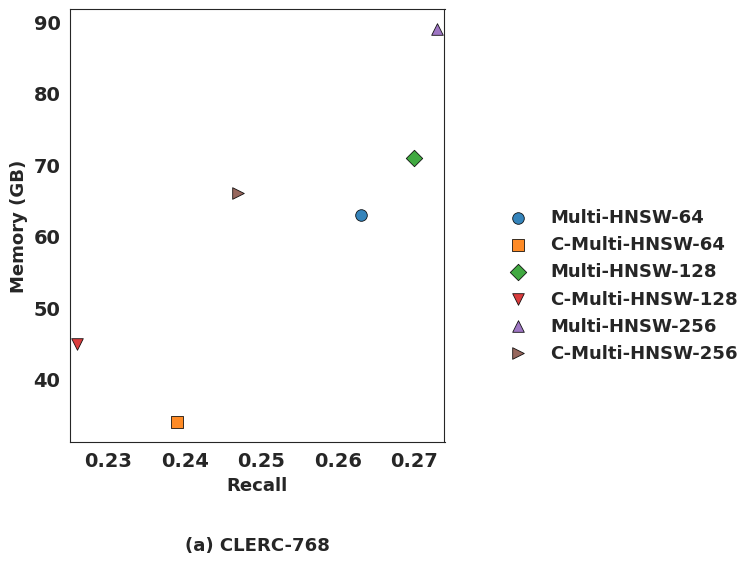

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colormaps as cm
import string

# -----------------------------
# 1. Global Plot Configuration
# -----------------------------
sns.set_style("white")  # no gridlines

plt.rcParams.update({
    'font.size': 16,
    'font.weight': 'bold',
    'axes.labelweight': 'bold',
    'axes.titlesize': 16,
    'axes.titleweight': 'bold'
})

# -----------------------------
# 2. Algorithm Style Map
# -----------------------------
# Example placeholders — replace with your actual data
# algorithms = ['Algo1', 'Algo2', 'Algo3']
# datasets = ['sift1m']

markers = ['o', 's', 'D', 'v', '^', '>', '<', 'p', '*', 'h', 'H', '+', 'x']
cmap = cm.get_cmap('tab10')
color_list = list(getattr(cmap, 'colors', [cmap(i / 10.0) for i in range(10)]))

algorithm_map = {
    algo: {
        'marker': markers[i % len(markers)],
        'color': color_list[i % len(color_list)]
    }
    for i, algo in enumerate(algorithms)
}

# -----------------------------
# 3. Dataset Label Map
# -----------------------------
subplot_labels = {
    'sift1m': 'SIFT1M',
    'gist1m': 'GIST1M',
    'deep1m': 'DEEP1M',
    'glove1m': 'GloVe1M',
    'msong': 'MSong',
    'tiny5m': 'Tiny5M'
}

# -----------------------------
# 4. Create Figure Layout
# -----------------------------
n_datasets = len(datasets)
fig, axes = plt.subplots(nrows=1, ncols=n_datasets, figsize=(4.5 * n_datasets, 6))
axes = axes.flatten() if n_datasets > 1 else [axes]

# -----------------------------
# 5. Plot Each Dataset
# -----------------------------
for i, ds in enumerate(datasets):
    ax = axes[i]
    df_subset = df[df['Dataset'] == ds]

    for algo in algorithms:
        data = df_subset[df_subset['Algorithm'] == algo].copy()
        data = data.sort_values(by='Recall')
        style = algorithm_map[algo]

        ax.scatter(
            data['Recall'],
            data['Memory (GB)'],
            label=algo,
            color=style['color'],
            marker=style['marker'],
            s=70,
            edgecolor='black',
            linewidth=0.6,
            alpha=0.9
        )

    # Axis scaling
    if not df_subset.empty:
        recall_min, recall_max = df_subset['Recall'].min(), df_subset['Recall'].max()
        mem_min, mem_max = df_subset['Memory (GB)'].min(), df_subset['Memory (GB)'].max()

        x_margin = 0.02 * (recall_max - recall_min if recall_max > recall_min else 0.1)
        y_margin = 0.05 * (mem_max - mem_min if mem_max > mem_min else 1)

        ax.set_xlim(recall_min - x_margin, recall_max + x_margin)
        ax.set_ylim(mem_min - y_margin, mem_max + y_margin)

    ax.set_xlabel('Recall', fontsize=13, fontweight='bold')
    ax.set_ylabel('Memory (GB)', fontsize=13, fontweight='bold')
    ax.tick_params(axis='both', labelsize=14, width=1.8)

    subplot_letter = f"({string.ascii_lowercase[i]}) "
    ax.text(
        0.5, -0.25,
        subplot_letter + subplot_labels.get(ds, ds),
        transform=ax.transAxes,
        ha='center',
        fontsize=13,
        fontweight='bold'
    )

# -----------------------------
# 6. Legend (Closer and cleaner)
# -----------------------------
handles, labels = axes[0].get_legend_handles_labels()

if n_datasets == 1:
    # Vertical legend extremely close to the plot
    fig.legend(
        handles, labels,
        loc='center left',
        bbox_to_anchor=(0.995, 0.5),  # << closer to the plot edge
        fontsize=13,
        frameon=False
    )
    fig.set_size_inches(5.0, 6)          # narrower width
    plt.tight_layout(rect=[0, 0, 0.965, 1])  # expand usable width
else:
    # Horizontal legend for multiple subplots
    fig.legend(
        handles, labels,
        loc='upper center',
        bbox_to_anchor=(0.5, 1.08),
        ncol=len(algorithms),
        fontsize=13,
        frameon=False
    )
    plt.tight_layout(rect=[0, 0, 1, 1])

# -----------------------------
# 7. Save & Show
# -----------------------------
fig.savefig('query_performance_plot_single_row.png', dpi=300, bbox_inches='tight')
plt.show()
